<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment1/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Q3**
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Part A

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X_data, Y_data = make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=None)

## Part B

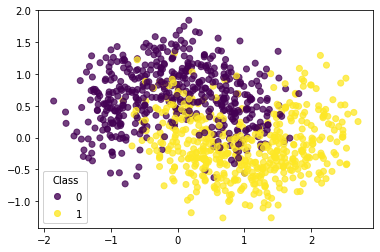

In [2]:
fig = plt.figure(num=1)
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(x=X_data[:,0], y=X_data[:,1], c=Y_data, alpha=0.75, marker='o')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Class")
ax.add_artist(legend1)
fig.show()

## Part C

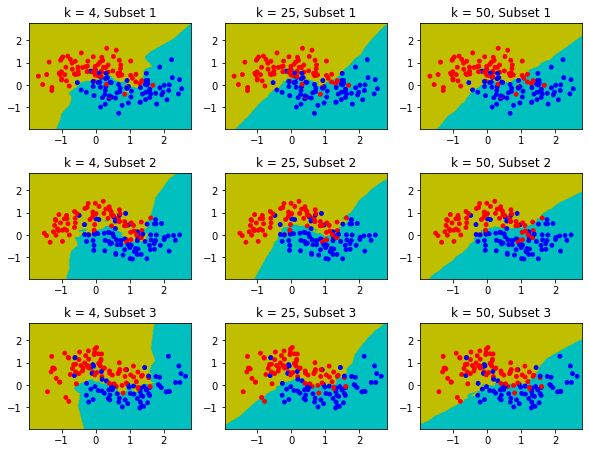

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

numberOfSamples = 150
numberOfSubset = 3
kList = [4, 25, 50]
step = .02  # step size in the mesh

idx = np.random.choice(X_data.shape[0], size=numberOfSubset*numberOfSamples, replace=False)

cmap_region = ListedColormap(['y', 'c'])
cmap_points = ListedColormap(['r', 'b'])
fig = plt.figure(num=2, figsize=(8.4, 6.4))
for i in range(numberOfSubset):
    X_train = X_data[idx[0+i*numberOfSamples:(i+1)*numberOfSamples], :]
    Y_train = Y_data[idx[0+i*numberOfSamples:(i+1)*numberOfSamples]]
    
    for j, n in enumerate(kList):
        classifier = KNeighborsClassifier(n_neighbors=n, weights='uniform')
        classifier.fit(X_train, Y_train)
        
        # Plot the decision boundary.
        x_min, x_max = X_data.min() - 0.1, X_data.max() + 0.1
        y_min, y_max = x_min, x_max
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
        prediction = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        prediction = prediction.reshape(xx.shape)
        ax = fig.add_subplot(3, 3, i*numberOfSubset+(j+1))
        ax.set_title(f'k = {n}, Subset {i+1}')
        plt.tight_layout()
        ax.pcolormesh(xx, yy, prediction, shading='gouraud', cmap=cmap_region)
        
        # Plot the training points.
        ax.scatter(x=X_train[:,0], y=X_train[:,1], c=Y_train, s=15, cmap=cmap_points)  

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
plt.show()        
